In [106]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits import mplot3d

In [107]:
# aceleração da gravidade (m/s)
g = 9.80665
# Área da seção transversal 1 (m)
a1 = math.pi*0.0045**2
# Área da seção transversal 2 (m)
a2 = (0.009 * 0.01028)/2
# Coeficiente de arrasto de uma bala
Cd = 0.24
#Massa da bala (kg)
m = 0.009
#Densidade do ar (kg/m^3)
ro = 1.2754
#Velocidade inicial da bala (m/s)
v0 = 823
#Velocidade do vento (m/s)
vento = 2.2

In [108]:
def modelo(d, lista_t):
    x = d[0]
    y = d[1] 
    vx = d[2]
    vy = d[3]
    
    P = m*g
    Fa = ((ro*a1*Cd*vy**2)/2)
    Fv = ((ro*a2*Cd*vx**2)/2)
    
    # Derivadas
    dxdt = vx
    dydt = vy
    dvxdt = Fv
    dvydt = -((Fa + P)/m)
    
    # Para se chegar no chão
    if y < 0:
        dxdt = 0
        dydt = 0
        dvxdt = 0
        dvydt = 0
    
    k = [dxdt, dydt, dvxdt, dvydt]
    
    return k

In [109]:
x_0 = 0
y_0 = 0
vx_0 = vento
vy_0 = v0

valores_iniciais = [x_0, y_0, vx_0, vy_0]

t_max = 40
delta_t = 10e-1

lista_t = np.arange(0, t_max, delta_t)

In [110]:
resultado = odeint(modelo, valores_iniciais, lista_t)

x = resultado[:,0]
y = resultado[:,1]
vx = resultado[:,2]
vy = resultado[:,3]


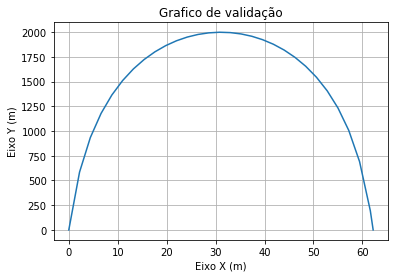

In [111]:
plt.plot(x, y)
plt.xlabel('Eixo X (m)')
plt.ylabel('Eixo Y (m)')
plt.title("Grafico de validação")
plt.grid(True)
plt.show()

In [112]:
a1 = math.pi*0.0037**2

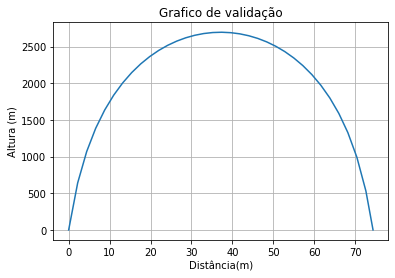

In [113]:
resultado = odeint(modelo, valores_iniciais, lista_t)

x = resultado[:,0]
y = resultado[:,1]
vx = resultado[:,2]
vy = resultado[:,3]

plt.plot(x, y)
plt.xlabel('Distância(m)')
plt.ylabel('Altura (m)')
plt.title("Grafico de validação")
plt.grid(True)
plt.show()

In [ ]:
# 0.22
m1 = 0.0018
v1 = 290

# 6.35
m2 = 0.0032
v2 = 230

# 0.45
m3 = 0.0149
v3 = 260

# 0.22 Long Rifle
m4 = 0.0018
v4 = 330

# 7.65 Browing
m5 = 0.0047
v5 = 300

massas = [m1, m2, m3, m4, m5]
velocidades = [v1, v2, v3, v4, v5]
legendas = ['.22 short', '6.35 Browning', '.45 Automatic Colt Pistol', '.22 Long Rifle', '7.65 Browing']

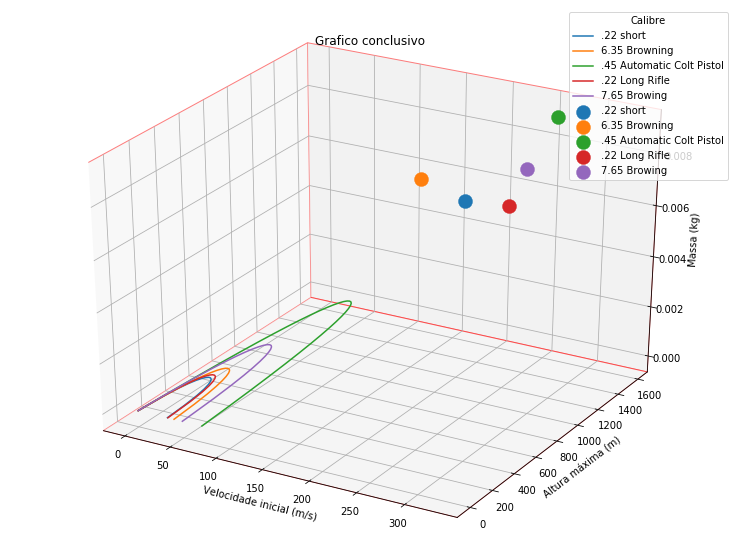

In [119]:
def modelo(d, lista_t, m):
    x = d[0]
    y = d[1] 
    vx = d[2]
    vy = d[3]
    
    P = m*g
    Fa = ((ro*a1*Cd*vy**2)/2)
    Fv = ((ro*a2*Cd*vx**2)/2)
    
    # Derivadas
    dxdt = vx
    dydt = vy
    dvxdt = Fv
    dvydt = -((Fa + P)/m)
    
    # Para se chegar no chão
    if y < 0:
        dxdt = 0
        dydt = 0
        dvxdt = 0
        dvydt = 0
    
    k = [dxdt, dydt, dvxdt, dvydt]
    
    return k



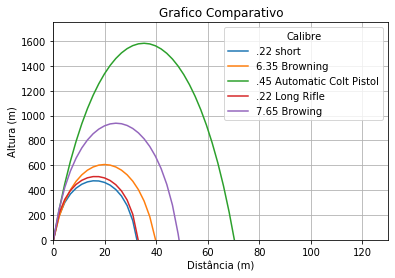

In [134]:
for i in range (len(massas)):
    x_0 = 0
    y_0 = 0
    vx_0 = vento
    vy_0 = velocidades[i]

    valores_iniciais = [x_0, y_0, vx_0, vy_0]
    
    resultado = odeint(modelo, valores_iniciais, lista_t, args = (massas[i],))
    
    x = resultado[:,0]
    y = resultado[:,1]
    vx = resultado[:,2]
    vy = resultado[:,3]
    
    plt.plot(x, y, label=legendas[i])


plt.xlabel('Distância (m)')
plt.ylabel('Altura (m)')
plt.title('Grafico Comparativo')
plt.legend(title='Calibre')
plt.axis([0,130,0, 1750])
plt.grid()
plt.show()

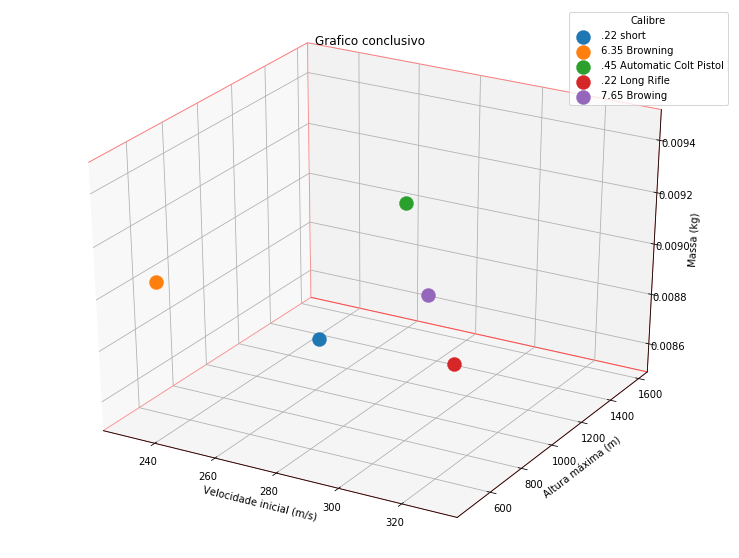

In [135]:
fig = plt.figure(figsize=(13,10))
ax = plt.axes(projection='3d')
ax.xaxis.pane.set_edgecolor('r')
ax.yaxis.pane.set_edgecolor('r')
ax.zaxis.pane.set_edgecolor('r')
ax.set_facecolor('white') 

for i in range (len(massas)):
    x_0 = 0
    y_0 = 0
    vx_0 = vento
    vy_0 = velocidades[i]

    valores_iniciais = [x_0, y_0, vx_0, vy_0]
    
    resultado = odeint(modelo, valores_iniciais, lista_t, args = (massas[i],))
    
    x = resultado[:,0]
    y = resultado[:,1]
    vx = resultado[:,2]
    vy = resultado[:,3]
    
    max_y = max(y)
    
    with plt.style.context('seaborn'):
        ax.scatter3D(vy_0, max_y, m, label = legendas[i], marker = 'o', s=200, depthshade=True)

    
ax.set_xlabel('Velocidade inicial (m/s)')
ax.set_ylabel('Altura máxima (m)')
ax.set_zlabel('Massa (kg)')
ax.set_title('Grafico conclusivo')
plt.legend(title='Calibre')
plt.show()